Please see the assignment below:
1. Perform an EDA on the given dataset will explanations
2. fit a regression Tree with a Tree Visualization along with various nd.arrays , which are properties of Tree object [as was done in class]  and match indices to generate a tabular representation of the Tree structure.

https://www.kaggle.com/c/covid19-global-forecasting-week-1/data?select=train.csv

# EDA on Covid Data

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp

In [75]:
# Loading data in dataframe
covid_data = pd.read_csv("train.csv")

In [76]:
covid_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [77]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17892 non-null  int64  
 1   Province/State  8190 non-null   object 
 2   Country/Region  17892 non-null  object 
 3   Lat             17892 non-null  float64
 4   Long            17892 non-null  float64
 5   Date            17892 non-null  object 
 6   ConfirmedCases  17892 non-null  float64
 7   Fatalities      17892 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [78]:
# Checking null fields
covid_data.isnull().sum()

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [79]:
# Fraction missing values for column 'Province/State'
9702/17892

0.5422535211267606

In [80]:
# Converting Date filled from object to datetime for plotting timeseries

covid_data["Date"] = pd.to_datetime(covid_data["Date"] )

In [81]:
# Calculating Fatality ratio of daily fatality and confirmed cases
# A higher Fatality ratio is bad

covid_data["Fatality_ratio"]= covid_data["Fatalities"]/covid_data["ConfirmedCases"]

In [82]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              17892 non-null  int64         
 1   Province/State  8190 non-null   object        
 2   Country/Region  17892 non-null  object        
 3   Lat             17892 non-null  float64       
 4   Long            17892 non-null  float64       
 5   Date            17892 non-null  datetime64[ns]
 6   ConfirmedCases  17892 non-null  float64       
 7   Fatalities      17892 non-null  float64       
 8   Fatality_ratio  6870 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.2+ MB


In [83]:
covid_data.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,Fatality_ratio
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,6870.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737,0.013828
std,7624.675152,22.935092,79.923261,3538.599684,174.346267,0.060010
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000,0.008502
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000,1.000000


### Plotting timeseries for all country

###  Confirmed Cases Vs Date for all countries

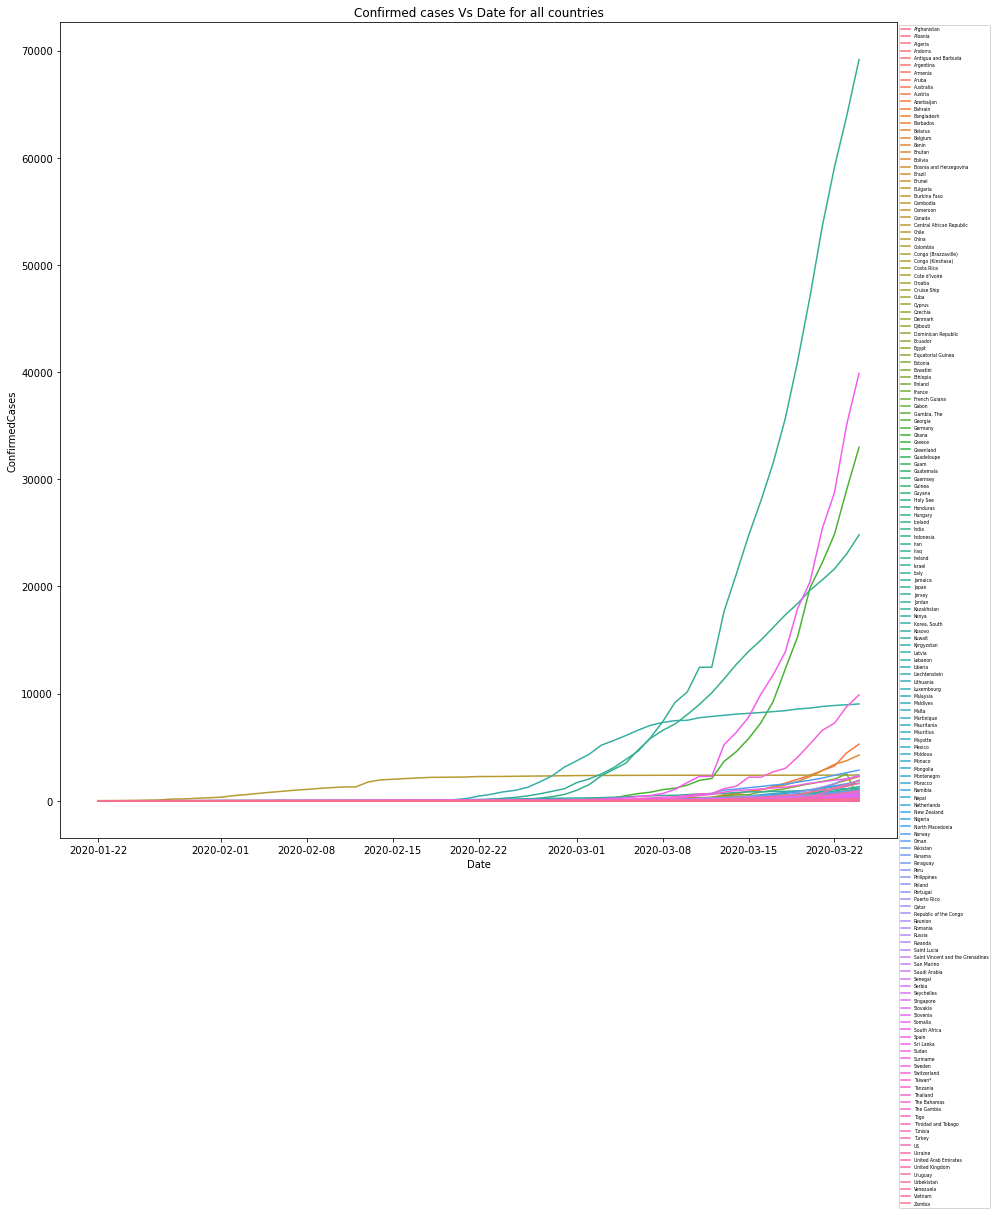

In [84]:
plt.figure(figsize=(15,15))

sns.lineplot(x='Date',y='ConfirmedCases',data =covid_data, hue='Country/Region',ci=None).legend(fontsize=4.5,bbox_to_anchor= (1,1))
plt.title('Confirmed cases Vs Date for all countries')
plt.show()

###  Fatalities vs Date  for all countries

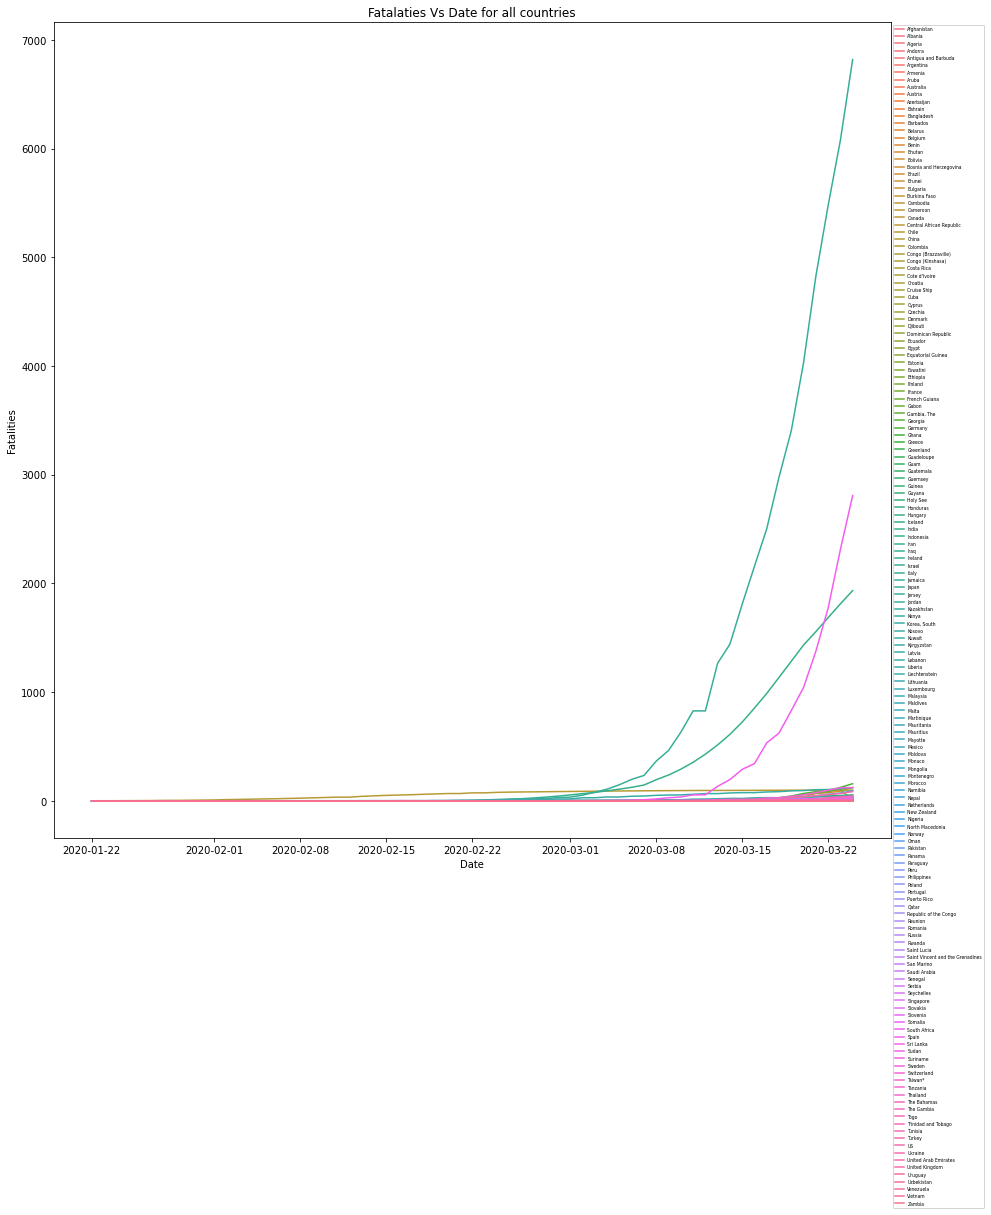

In [85]:
plt.figure(figsize=(15,15))

sns.lineplot(x='Date',y='Fatalities',data =covid_data, hue='Country/Region',ci=None).legend(fontsize=4.5,bbox_to_anchor= (1,1))
plt.title('Fatalaties Vs Date for all countries')
plt.show()

### Fatality ratio vs Date  for all countries

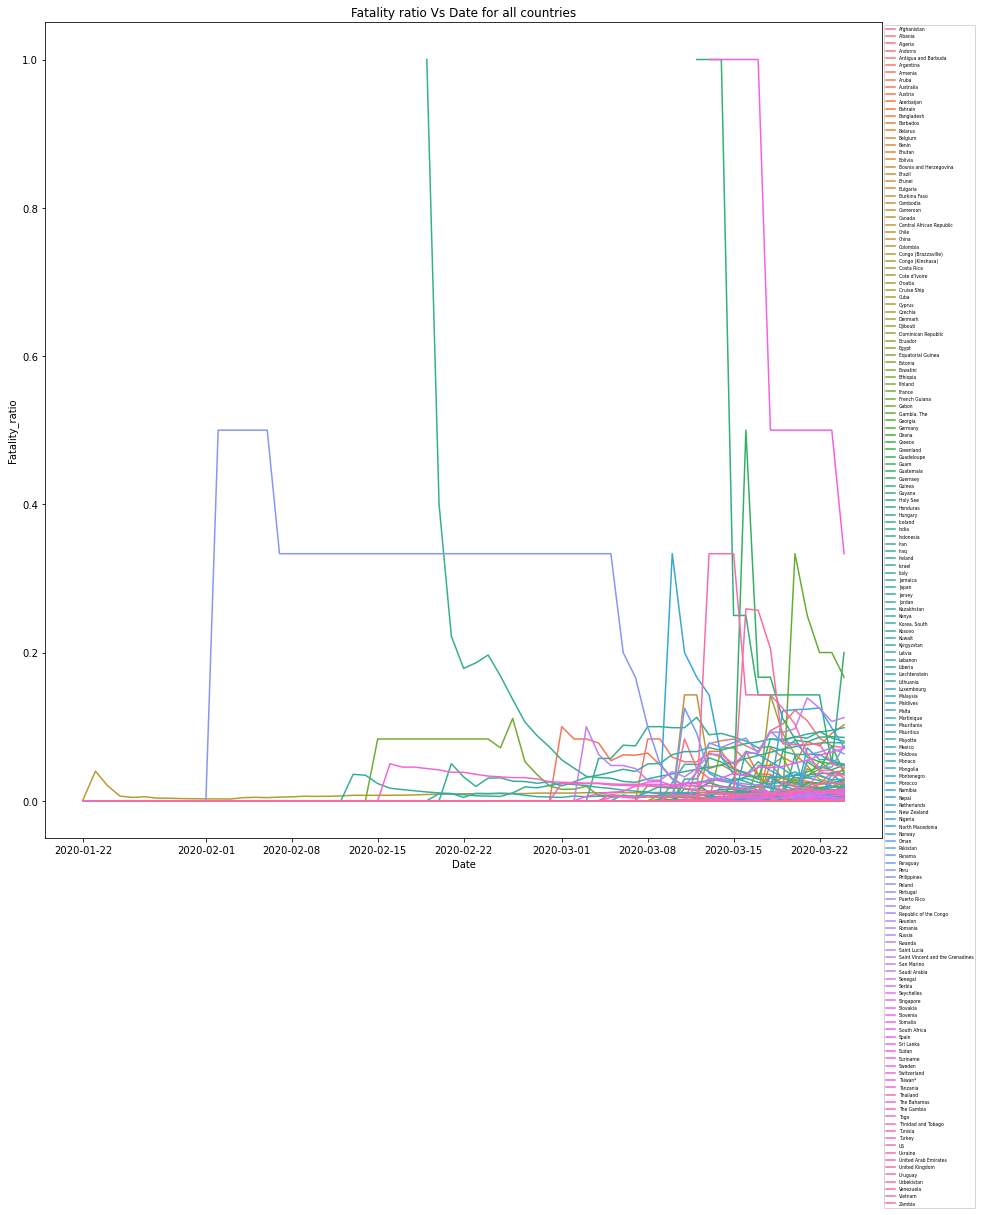

In [86]:
# Fatality ratio of countries initially increased and later came down

plt.figure(figsize=(15,15))

sns.lineplot(x='Date',y='Fatality_ratio',data =covid_data, hue='Country/Region',ci=None).legend(fontsize=4.5,bbox_to_anchor= (1,1))
plt.title('Fatality ratio Vs Date for all countries')
plt.show()

### Country wise covid cases and fatalities

In [87]:
# Finding all confirmed cases and fatalities for each country

covid_data_grouped = covid_data.groupby('Country/Region').sum()
covid_data_grouped = covid_data_grouped.drop(columns=['Id','Lat','Long'])
covid_data_grouped['Country/Region'] = np.array(covid_data_grouped.index)

In [88]:
covid_data_grouped.head(5)

,ConfirmedCases,Fatalities,Fatality_ratio,Country/Region
Country/Region,,,,
Afghanistan,363.0,3.0,0.063514,Afghanistan
Albania,851.0,26.0,0.466649,Albania
Algeria,1485.0,113.0,1.082384,Algeria
Andorra,720.0,3.0,0.022466,Andorra
Antigua and Barbuda,16.0,0.0,0.000000,Antigua and Barbuda


### Top 5 Countries with ConfirmedCases and Fatalities

In [89]:
# Top 5 Countries with ConfirmedCases
covid_data_grouped.sort_values('ConfirmedCases',ascending=False).head(5)

,ConfirmedCases,Fatalities,Fatality_ratio,Country/Region
Country/Region,,,,
China,3500461.0,121046.0,16.141325,China
Italy,571924.0,46856.0,1.790214,Italy
Iran,278992.0,16870.0,3.961988,Iran
Spain,232453.0,12464.0,0.745846,Spain
US,219412.0,2972.0,7.951247,US


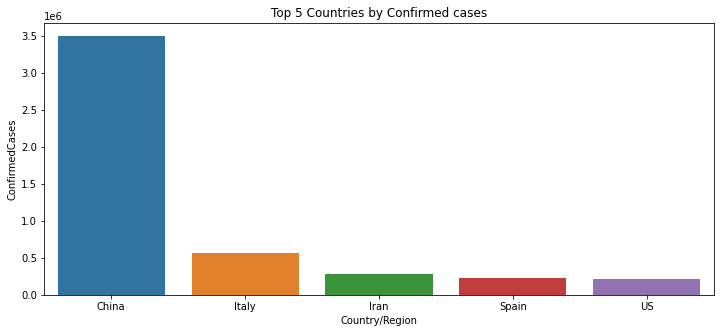

In [90]:
# plotting total Confirmed cases for top 5 countries

plt.figure(figsize=(12,5))
sns.barplot(x='Country/Region',y='ConfirmedCases', data=covid_data_grouped.sort_values('ConfirmedCases',ascending=False).head(5))
plt.title('Top 5 Countries by Confirmed cases')
plt.show()

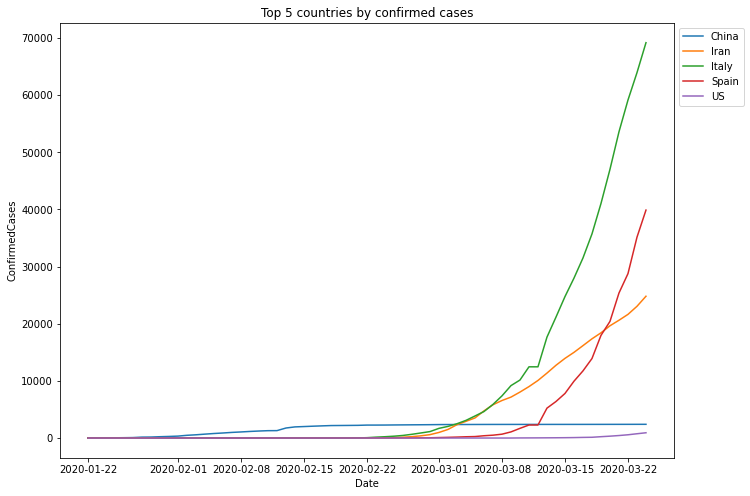

In [91]:
# Plotting times series data for total confirmed cases of top 5 countries

covid_data_top_cases = covid_data[(covid_data['Country/Region'] == 'China')|(covid_data['Country/Region'] == 'Italy')|
          (covid_data['Country/Region'] == 'Iran')|(covid_data['Country/Region'] == 'Spain')|
          (covid_data['Country/Region'] == 'US')]

plt.figure(figsize=(11,8))
sns.lineplot(x='Date',y='ConfirmedCases',data =covid_data_top_cases, hue='Country/Region',ci=None).legend(fontsize=10,bbox_to_anchor= (1,1))
plt.title('Top 5 countries by confirmed cases')
plt.show()

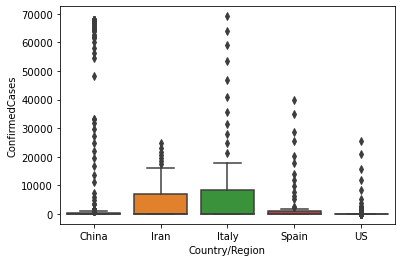

In [92]:
# boxplot of confirmed cases of top 5 countries
sns.boxplot(x='Country/Region',y='ConfirmedCases',data=covid_data_top_cases)
plt.show()

In [93]:
# Top 5 Countries by Fatalities
covid_data_grouped.sort_values('Fatalities',ascending=False).head(5)

,ConfirmedCases,Fatalities,Fatality_ratio,Country/Region
Country/Region,,,,
China,3500461.0,121046.0,16.141325,China
Italy,571924.0,46856.0,1.790214,Italy
Iran,278992.0,16870.0,3.961988,Iran
Spain,232453.0,12464.0,0.745846,Spain
France,122701.0,3721.0,1.657970,France


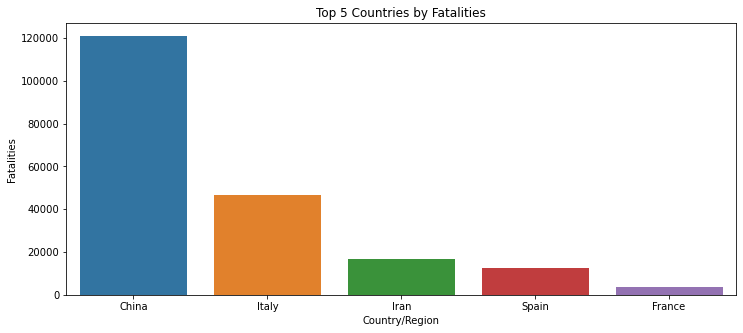

In [94]:
# plotting fatalities for top 5 countries

plt.figure(figsize=(12,5))
sns.barplot(x='Country/Region',y='Fatalities', data=covid_data_grouped.sort_values('Fatalities',ascending=False).head(5))
plt.title('Top 5 Countries by Fatalities')
plt.show()

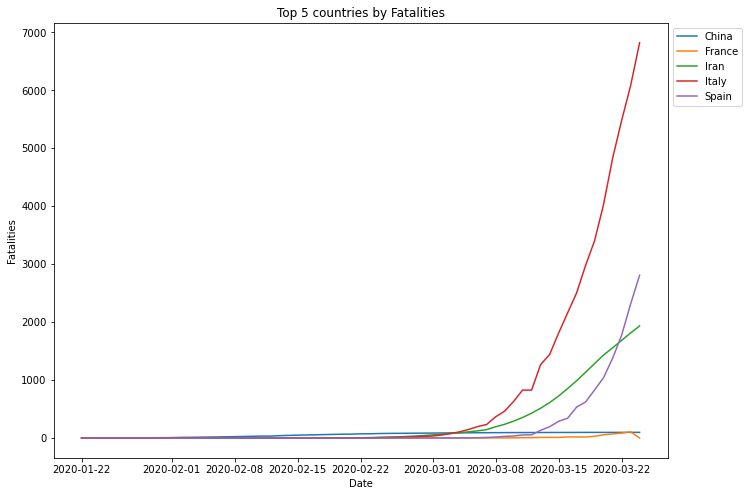

In [95]:
# Plotting times series data for total fatalities of top 5 countries
covid_data_top_fatalities = covid_data[(covid_data['Country/Region'] == 'China')|(covid_data['Country/Region'] == 'Italy')|
          (covid_data['Country/Region'] == 'Iran')|(covid_data['Country/Region'] == 'Spain')|
          (covid_data['Country/Region'] == 'France')]



plt.figure(figsize=(11,8))

sns.lineplot(x='Date',y='Fatalities',data =covid_data_top_fatalities, hue='Country/Region',ci=None).legend(fontsize=10,bbox_to_anchor= (1,1))
plt.title('Top 5 countries by Fatalities')
plt.show()

In [96]:
# Top 5 Countries: Fatality ratio
covid_data_grouped.sort_values('Fatality_ratio',ascending=False).head(5)

,ConfirmedCases,Fatalities,Fatality_ratio,Country/Region
Country/Region,,,,
China,3500461.0,121046.0,16.141325,China
Philippines,3266.0,255.0,13.329794,Philippines
Sudan,20.0,12.0,8.333333,Sudan
US,219412.0,2972.0,7.951247,US
United Kingdom,44451.0,1859.0,5.236562,United Kingdom


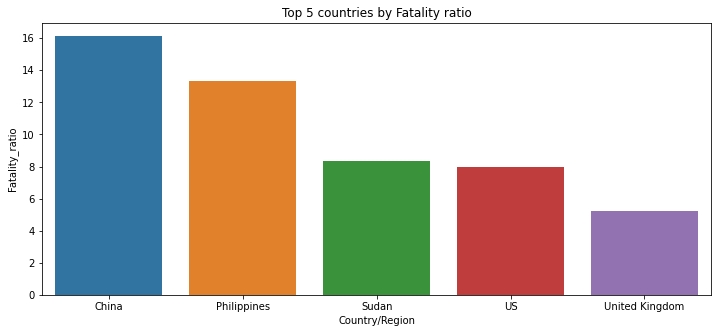

In [97]:
# plotting Fatality ratio for top 5 countries

plt.figure(figsize=(12,5))
sns.barplot(x='Country/Region',y='Fatality_ratio', data=covid_data_grouped.sort_values('Fatality_ratio',ascending=False).head(5))
plt.title('Top 5 countries by Fatality ratio')
plt.show()

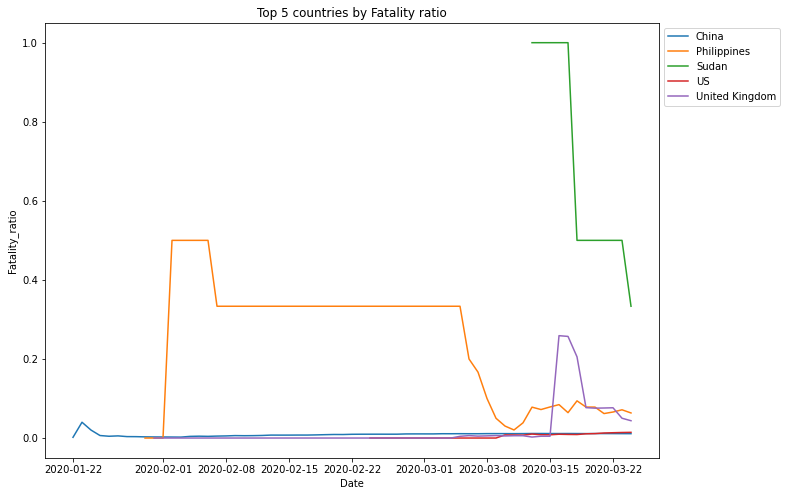

In [98]:
# Plotting times series data for total fatalities of top 5 countries
covid_data_top_fatalities = covid_data[(covid_data['Country/Region'] == 'China')|(covid_data['Country/Region'] == 'Philippines')|
          (covid_data['Country/Region'] == 'Sudan')|(covid_data['Country/Region'] == 'US')|
          (covid_data['Country/Region'] == 'United Kingdom')]



plt.figure(figsize=(11,8))

sns.lineplot(x='Date',y='Fatality_ratio',data =covid_data_top_fatalities, hue='Country/Region',ci=None).legend(fontsize=10,bbox_to_anchor= (1,1))
plt.title('Top 5 countries by Fatality ratio')
plt.show()

### Compaing Confirmed Cases and Fatalities for two country

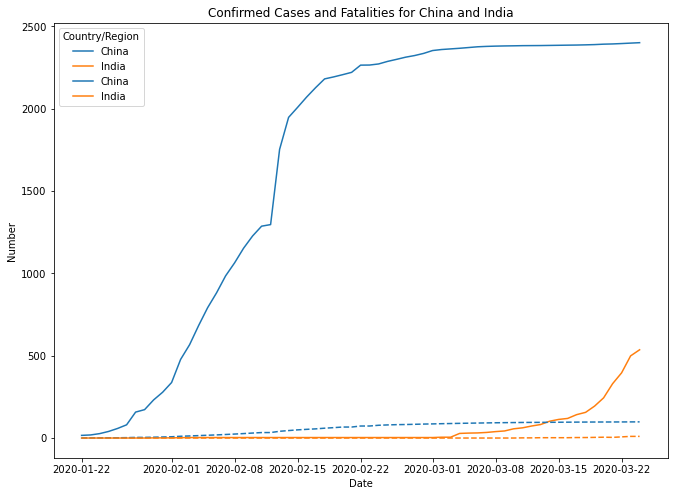

In [99]:
covid_data_top_fatalities = covid_data[(covid_data['Country/Region'] == 'China')|(covid_data['Country/Region'] == 'India')]

plt.figure(figsize=(11,8))
sns.lineplot(x='Date',y='ConfirmedCases',data =covid_data_top_fatalities, hue='Country/Region',ci=None).legend(fontsize=10,bbox_to_anchor= (1,1))
sns.lineplot(x='Date',y='Fatalities',data =covid_data_top_fatalities, hue='Country/Region',linestyle='--',ci=None)
plt.ylabel('Number')
plt.title('Confirmed Cases and Fatalities for China and India')
plt.show()

### Countries with minimum ConfirmedCases

In [100]:
covid_data_grouped[covid_data_grouped['ConfirmedCases'] == covid_data_grouped['ConfirmedCases'].min()]

,ConfirmedCases,Fatalities,Fatality_ratio,Country/Region
Country/Region,,,,
Aruba,0.0,0.0,0.0,Aruba
Cameroon,0.0,0.0,0.0,Cameroon
Cruise Ship,0.0,0.0,0.0,Cruise Ship
Czechia,0.0,0.0,0.0,Czechia
French Guiana,0.0,0.0,0.0,French Guiana
"Gambia, The",0.0,0.0,0.0,"Gambia, The"
Greenland,0.0,0.0,0.0,Greenland
Guadeloupe,0.0,0.0,0.0,Guadeloupe
Guam,0.0,0.0,0.0,Guam


### Plotting data on Map

In [101]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [102]:
# plotting latitude and longitude on map for places which have non zero confirmed cases and fatalities
covid_data_confirmed = covid_data[covid_data['ConfirmedCases']!=0]
covid_data_fatal = covid_data[covid_data['Fatalities']!=0]

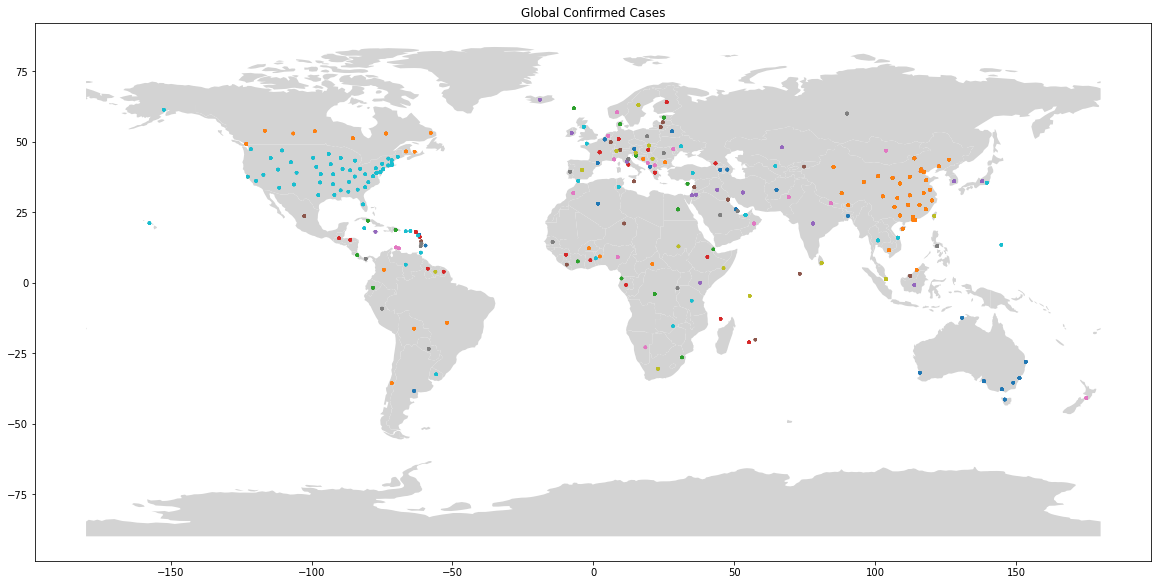

In [103]:
# Plotting global confirmed cases

gdf = gpd.GeoDataFrame(
    covid_data_confirmed, geometry=gpd.points_from_xy(covid_data_confirmed['Long'], covid_data_confirmed['Lat']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='lightgrey',figsize=(20, 12))

gdf.plot(ax=ax, column = covid_data_confirmed['Country/Region'],  markersize =5)
plt.title('Global Confirmed Cases')
plt.show()

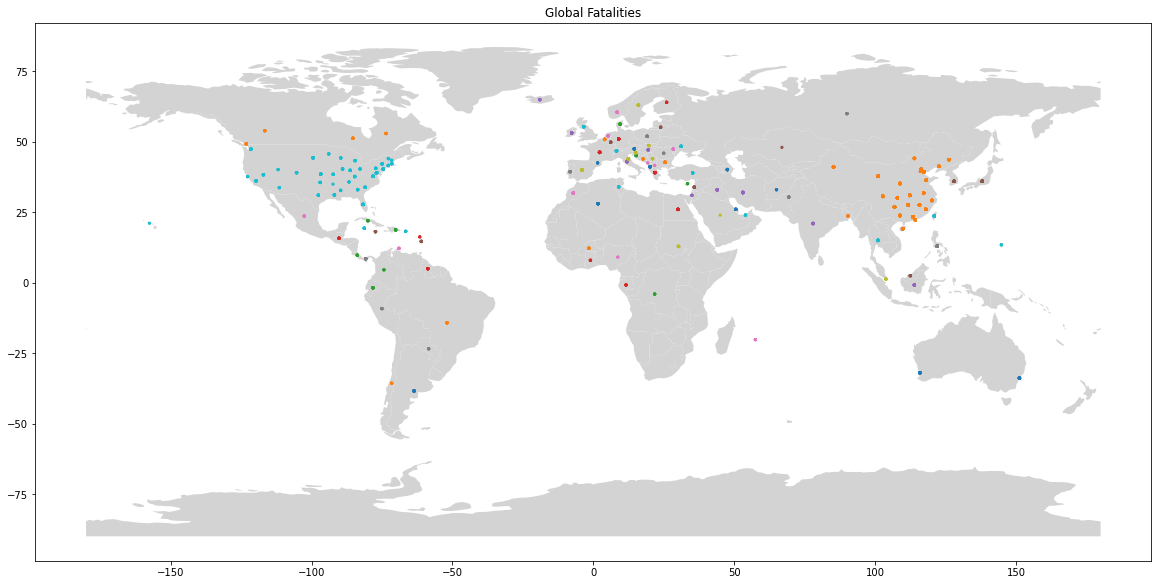

In [104]:
# Plotting global fatalities
gdf = gpd.GeoDataFrame(
    covid_data_fatal, geometry=gpd.points_from_xy(covid_data_fatal['Long'], covid_data_fatal['Lat']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='lightgrey',figsize=(20, 12))

gdf.plot(ax=ax, column = covid_data_fatal['Country/Region'],  markersize =5)
plt.title('Global Fatalities')
plt.show()

---------------------------------

# Fit Regression tree

In [105]:
# Predicting Fatalities from other features of dataset

In [106]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [107]:
covid_data

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Fatality_ratio
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,NaN
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,NaN
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,NaN
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,NaN
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0,0.0


In [108]:
# Create dataframe with features for prediction as Country/Region,Lat,Long,Date,ConfirmedCases

X = pd.DataFrame()

# Province/State has been removed as there too many missing  (9702/17892 =54%)
# X['Province/State'] = covid_data['Province/State']
X['Country/Region'] = covid_data['Country/Region']
X['Lat'] = covid_data['Lat']
X['Long'] = covid_data['Long']
X['Date'] = covid_data['Date'].values.astype(float)     # converting date time object to float for training
X['ConfirmedCases'] =  covid_data['ConfirmedCases']

y = covid_data['Fatalities']

In [109]:
X = pd.get_dummies(X, drop_first=True)    # One hot encoding of categorical variable Country/Region

In [110]:
# Predictor variables
X

,Lat,Long,Date,ConfirmedCases,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,...,Country/Region_Turkey,Country/Region_US,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia
0,33.0000,65.0000,1.579651e+18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33.0000,65.0000,1.579738e+18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.0000,65.0000,1.579824e+18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0000,65.0000,1.579910e+18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.0000,65.0000,1.579997e+18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,-15.4167,28.2833,1.584662e+18,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17888,-15.4167,28.2833,1.584749e+18,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17889,-15.4167,28.2833,1.584835e+18,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17890,-15.4167,28.2833,1.584922e+18,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
# Target variable (Fatalities)
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17887    0.0
17888    0.0
17889    0.0
17890    0.0
17891    0.0
Name: Fatalities, Length: 17892, dtype: float64

In [112]:
# Splitting data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [113]:
# Using decision tree regressor and fitting traing data
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor()

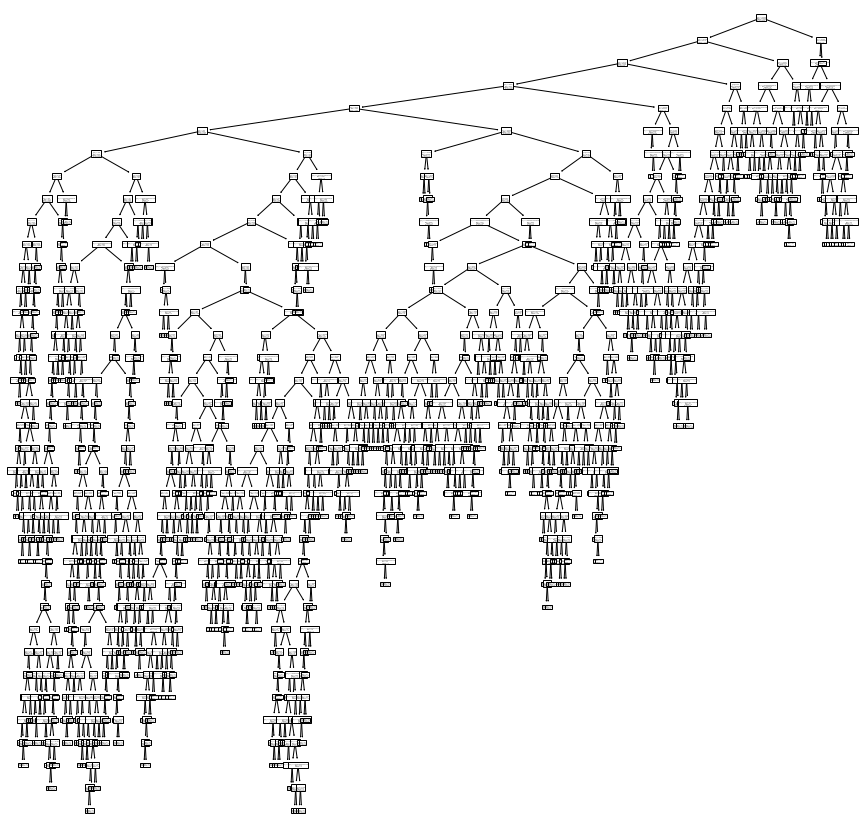

In [114]:
# Visualisation of decision tree 

plt.figure(figsize=(15,15))
tree.plot_tree(clf)
plt.show()

In [115]:
# Chceking accuracy of model on test data

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.r2_score(y_test, y_pred))

# we are getting relatively high r2 score because the ConfirmedCases(predictor) and fatalities(target) are highly correlated

Accuracy: 0.9670661765142459


In [116]:
# Number of nodes in tree
n_nodes = clf.tree_.node_count
n_nodes

1783

In [117]:
# Left childeren in tree

children_left = clf.tree_.children_left
children_left

array([ 1,  2,  3, ..., -1, -1, -1], dtype=int64)

In [118]:
# Right childeren in tree

children_right = clf.tree_.children_right
children_right

array([1726, 1657, 1562, ...,   -1,   -1,   -1], dtype=int64)

In [119]:
# return features of tree

feature = clf.tree_.feature
feature

array([ 3,  3,  3, ..., -2, -2, -2], dtype=int64)

In [120]:
# return threshold values of features of tree

threshold = clf.tree_.threshold
threshold

array([ 3.4251e+04,  1.0112e+04,  3.2755e+03, ..., -2.0000e+00,
       -2.0000e+00, -2.0000e+00])

In [121]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)

In [122]:
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))


The binary tree structure has 1783 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 34251.0 else to node 1726.
	node=1 is a split node: go to node 2 if X[:, 3] <= 10112.0 else to node 1657.
		node=2 is a split node: go to node 3 if X[:, 3] <= 3275.5 else to node 1562.
			node=3 is a split node: go to node 4 if X[:, 3] <= 1482.0 else to node 1465.
				node=4 is a split node: go to node 5 if X[:, 3] <= 306.5 else to node 990.
					node=5 is a split node: go to node 6 if X[:, 3] <= 75.5 else to node 491.
						node=6 is a split node: go to node 7 if X[:, 3] <= 26.5 else to node 202.
							node=7 is a split node: go to node 8 if X[:, 120] <= 0.5 else to node 199.
								node=8 is a split node: go to node 9 if X[:, 3] <= 10.5 else to node 90.
									node=9 is a split node: go to node 10 if X[:, 3] <= 1.5 else to node 33.
										node=10 is a split node: go to node 11 if X[:, 144] <= 0.5 else to node 30.
											node=11 is a split node: